<a href="https://colab.research.google.com/github/Visionaryofthefuture/Machine-Learning/blob/main/Support_Vector_Regressionipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [24]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScalerx
from sklearn.model_selection import train_test_split


In [18]:
file = "/content/Position_Salaries.csv"
df = pd.DataFrame(pd.read_csv(file))
df

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000
5,Region Manager,6,150000
6,Partner,7,200000
7,Senior Partner,8,300000
8,C-level,9,500000
9,CEO,10,1000000


In [19]:
X = df.iloc[:,1:-1].values
Y = df.iloc[:, -1].values

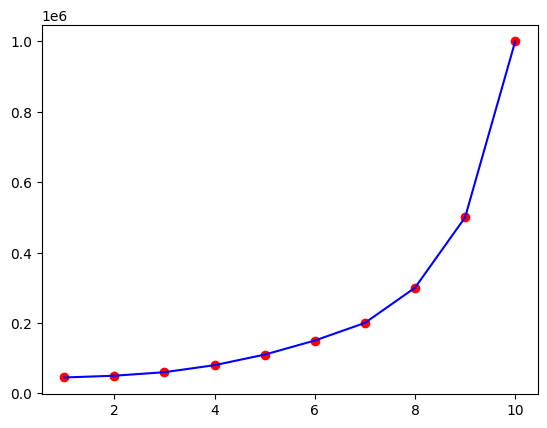

In [20]:
plt.scatter(X,Y, color = "red")
plt.plot(X,Y, color = "blue")
plt.show()

In [23]:
print(X)
print(Y)

[[ 1]
 [ 2]
 [ 3]
 [ 4]
 [ 5]
 [ 6]
 [ 7]
 [ 8]
 [ 9]
 [10]]
[  45000   50000   60000   80000  110000  150000  200000  300000  500000
 1000000]


Reshaping the Y


In [28]:
Y = Y.reshape(len(Y), 1)
Y

array([[  45000],
       [  50000],
       [  60000],
       [  80000],
       [ 110000],
       [ 150000],
       [ 200000],
       [ 300000],
       [ 500000],
       [1000000]])

In [48]:
from sklearn.preprocessing import StandardScaler
sc_x = StandardScaler()
sc_y = StandardScaler()

In [50]:
X = sc_x.fit_transform(X)
Y = sc_y.fit_transform(Y)

In [49]:
X

array([[-1.5666989 ],
       [-1.21854359],
       [-0.87038828],
       [-0.52223297],
       [-0.17407766],
       [ 0.17407766],
       [ 0.52223297],
       [ 0.87038828],
       [ 1.21854359],
       [ 1.5666989 ]])

In [51]:
Y

array([[-0.72004253],
       [-0.70243757],
       [-0.66722767],
       [-0.59680786],
       [-0.49117815],
       [-0.35033854],
       [-0.17428902],
       [ 0.17781001],
       [ 0.88200808],
       [ 2.64250325]])

Applied Feature Scaling so independent variables wont be neglected by Y


In [52]:
from sklearn.svm import SVR

SVR_regressor = SVR(kernel = "rbf")

In [53]:
SVR_regressor.fit(X,Y)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR()

In [57]:
k = sc_y.inverse_transform(SVR_regressor.predict(sc_x.transform(X)).reshape(-1, 1))

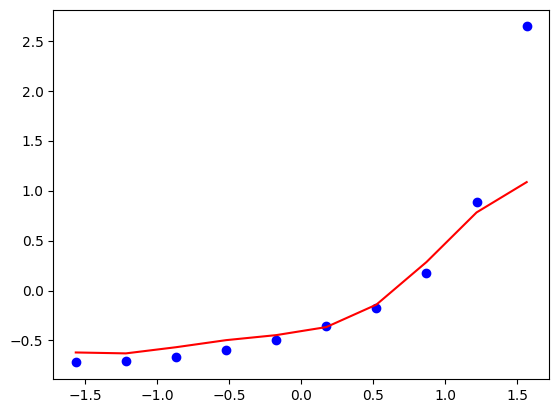

In [58]:
plt.scatter(sc_x.inverse_transform(X), sc_y.inverse_transform(Y) , color = "blue")
plt.plot(sc_x.inverse_transform(X), k , color = "red")